In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [18]:
plt.style.use('dark_background')

# Download and import the Data Science Job Salary dataset

In [2]:
from google.colab import files
files.upload()

Saving DataScienceJobSalaries.zip to DataScienceJobSalaries.zip


{'DataScienceJobSalaries.zip': b'PK\x03\x04-\x00\x00\x00\x08\x00fG\xcfT\x88X\x82\xd1\xff\xff\xff\xff\xff\xff\xff\xff\x0f\x00\x14\x00ds_salaries.csv\x01\x00\x10\x00`\x90\x00\x00\x00\x00\x00\x00\xce\x1c\x00\x00\x00\x00\x00\x00\xa5]\xdbZ]7\x92\xbe\xe7)\xfc\x00\xebb\xe9,]\x02&6\t\xb8i\xb0\xf3\xa5\xe7\xc6\x1fCv\xd2L;\xe0\x0f\xf0\xf4x\x9e~t,\x95\x96\xa4\xda{p.v\xca\x89\xff%\xa9T\xaa\xb3\xd6Z\xfe\xfd\xf8\xf4\xaf\xcf\xdfw\xb7O\xcb\xee\x7f\xbe\xee\x9e\xeew\x0fw\xbb\xcf_v\xff\xbd\xfb\xb2\xec\xfe\xfa\xfa\xe5\xf1\xfb_\xbb\x87\x97\xcf/\xdf\xbf\xee\x96\xffz\xfc\xcf\xcf/\xf7/_v\xcb\xf3\xed\x97\xdb\xa7\xef\xf9_\x9f\xef\xbe==y\x18\xfc\xf9\xfe\xe1\xf3\xb7\xe7\xdf3|\xb7\xfb\xfc\xb4{\xbe\xff=<wy\xda\xfd\xf5\xf8\xe2\xff\xc3\xed\xcb\xfd\xe3r\xf7\xf8\xd7\xd7\xdb\x87\xef\x9f\xbf<\xde\x85??\xc0\x7fx\xbe\xff\xdf\xdd\xd1\xba\xf0\x95\xaf\xcb\xe5\xf9\xf2\xd3\xc7\xe5\xed\xed\xcb\xed\x9b\x9b;?\xb9\x97\xfb\xe7\x97\xc5\xac\xfe\x9f\xe5\xec\xd3\xf5b\x9c\x15by{\xb6\xac\xe1\xe7\xe2\x88%\xd4\xcdY@]\xde\xde\xfd\xf3\xfea\xf7

In [3]:
!unzip DataScienceJobSalaries.zip

Archive:  DataScienceJobSalaries.zip
  inflating: ds_salaries.csv         


In [5]:
df = pd.read_csv('/content/ds_salaries.csv')

# Identify and differentiate between quantitative and qualitative data within the dataset.

In [8]:
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


**quantitative:work_year, salary, salary_in_usd, remote_ratio**

**All other is qualitative, because they r categorial**

**unnamed doesnt make sense for analyzing**

# Preprocess the data by handling missing values and removing duplicates if needed.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


There are no NaN values in the table

In [10]:
df.duplicated().sum()

0

There are no duplicates values

# Perform a group-wise analysis of the experience_level column, calculating the mean and median salaries for each group using Pandas’ .groupby.

In [12]:
df_copy = df.copy()

In [13]:
df = df[['experience_level', 'salary_in_usd']]

In [14]:
df['experience_level'].unique()

array(['MI', 'SE', 'EN', 'EX'], dtype=object)

Find the mean

In [20]:
df_mean = df.groupby('experience_level').mean()
df_mean = df_mean.sort_values(by='salary_in_usd', ascending=False)
df_mean

,salary_in_usd
experience_level,
EX,199392.038462
SE,138617.292857
MI,87996.056338
EN,61643.318182


find the median

In [21]:
df_median = df.groupby('experience_level').median()
df_median = df_median.sort_values(by='salary_in_usd', ascending=False)
df_median

,salary_in_usd
experience_level,
EX,171437.5
SE,135500.0
MI,76940.0
EN,56500.0


# Utilize Pandas’ integration with Matplotlib to create a bar chart visualizing the average salaries for each experience level. Ensure the chart includes appropriate labels, a title, and a color scheme that enhances readability.

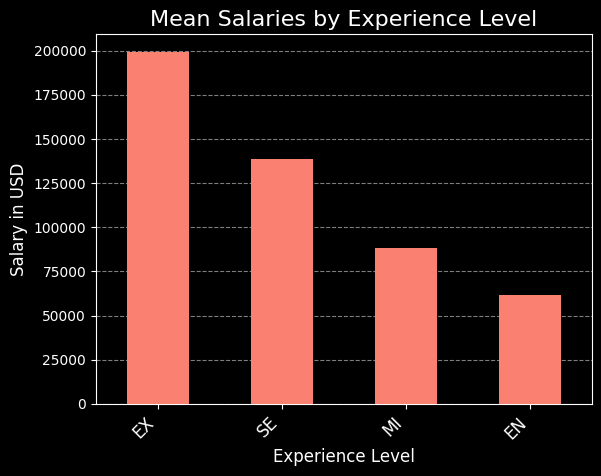

In [46]:
df_mean.plot(kind='bar', color='salmon', alpha = 1, zorder=3, legend=False)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.title("Mean Salaries by Experience Level", fontsize=16)
plt.xlabel("Experience Level", fontsize=12)
plt.xticks(fontsize=12, rotation=45, ha='right')
plt.ylabel("Salary in USD", fontsize=12)
plt.show()